<a href="https://colab.research.google.com/github/AnanyaMaram/Data-Science/blob/master/Copy_of_ADS_EXPL2_ananya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Reading the file into a dataframe

In [ ]:
df=pd.read_csv('Federal_aviation_dataset.csv')
print(df.shape)
df

(83, 42)


,UPDATED,ENTRY_DATE,EVENT_DATE,EVENT_LCL_TIME,LOC_CITY_NAME,LOC_STATE_NAME,LOC_CNTRY_NAME,RMK_TEXT,EVENT_TYPE_DESC,Flight standard district,REGIST_NBR,FLT_NBR,Aircraft operator,ACFT_MAKE_NAME,ACFT_MODEL_NAME,ACFT_MISSING_FLAG,ACFT_Damage_desc,FLT_ACTIVITY,FLT_PHASE,FAR_PART,Max_Injuried_level,FATAL_FLAG,FLT_CREW_INJ_NONE,FLT_CRW_INJ_MINOR,FLT_CRW_INJ_SERIOUS,FLT_CRW_INJ_FATAL,FLT_CRW_INJ_UNK,CBN_CRW_INJ_NONE,CABIN_CRW_INJ_MINOR,CBN_CRW_INJ_SERIOUS,CBN_CRW_INJ_FATAL,CBN_CRW_INJ_UNK,PASSENGER_INJ_NONE,PAX_INJ_MINOR,PAX_INJ_SERIOUS,PAX_INJ_FATAL,PAX_INJ_UNK,GROUND_INJ_NONE,GRND_INJ_MINOR,GRND_INJ_SERIOUS,GRND_INJ_FATAL,GRND_INJ_UNK
0,No,19-Feb-16,19-Feb-16,00:45:00Z,MARSHVILLE,North Carolina,NaN,"AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON B...",Accident,FAA Charlotte FSDO-68,N61WB,NaN,NaN,BEECH,36,NaN,Unknown,NaN,UNKNOWN (UNK),NaN,Fatal,Yes,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,19-Feb-16,18-Feb-16,23:55:00Z,TAVERNIER,Florida,NaN,AIRCRAFT ON LANDING WENT OFF THE END OF THE RU...,Incident,FAA Miami FSDO-19,N705RP,NaN,NaN,VANS,RV7,NaN,Unknown,NaN,LANDING (LDG),NaN,None,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,No,19-Feb-16,18-Feb-16,22:14:00Z,TRENTON,New Jersey,NaN,"AIRCRAFT ON FINAL SUSTAINED A BIRD STRIKE, LAN...",Incident,FAA Philadelphia FSDO-17,N9563A,NaN,NaN,CESSNA,172,NaN,Minor,NaN,APPROACH (APR),NaN,None,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,19-Feb-16,18-Feb-16,17:10:00Z,ASHEVILLE,North Carolina,NaN,"AIRCRAFT ON LANDING, GEAR COLLAPSED, ASHEVILLE...",Incident,FAA Charlotte FSDO-68,N10CF,NaN,NaN,LANCAIR,235,NaN,Unknown,NaN,LANDING (LDG),NaN,None,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,No,19-Feb-16,18-Feb-16,00:26:00Z,TALKEETNA,Alaska,NaN,"AIRCRAFT ON LANDING, NOSE GEAR COLLAPSED, TALK...",Incident,FAA Anchorage FSDO-03,N1530Y,NaN,NaN,CESSNA,172,NaN,Minor,NaN,LANDING (LDG),NaN,Minor,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,No,08-Feb-16,31-Dec-15,17:00:00Z,SAN ANTONIO,Texas,NaN,"AIRCRAFT ON LANDING, GROUND LOOPED, BULVERDE A...",Accident,FAA San Antonio FSDO-17,N47185,NaN,NaN,AERONCA,O58B,NaN,Substantial,NaN,LANDING (LDG),NaN,None,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,No,08-Feb-16,05-Feb-16,11:17:00Z,MARICOPA,Arizona,NaN,"AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES, ...",Accident,FAA Scottsdale FSDO-07,N551JP,NaN,NaN,NORTH AMERICAN,F51,NaN,Destroyed,NaN,UNKNOWN (UNK),NaN,Fatal,Yes,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,No,08-Feb-16,05-Feb-16,23:02:00Z,SAN PEDRO,California,NaN,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",Accident,FAA Long Beach FSDO-05,N5057G,NaN,NaN,CHAMPION,8KCAB,NaN,Destroyed,NaN,UNKNOWN (UNK),NaN,Fatal,Yes,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,No,08-Feb-16,05-Feb-16,23:02:00Z,SAN PEDRO,California,NaN,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",Accident,FAA Long Beach FSDO-05,N9872R,NaN,NaN,BEECH,35,NaN,Destroyed,NaN,UNKNOWN (UNK),NaN,Fatal,Yes,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now I would like to take the new data frame which only contains the injuries and deaths so that we can find the total deaths and injuries

In [ ]:
df3=df[df.columns[22:48]]
aircraft_name=df['ACFT_MAKE_NAME']
df3=df3.join(aircraft_name)
df3

,FLT_CREW_INJ_NONE,FLT_CRW_INJ_MINOR,FLT_CRW_INJ_SERIOUS,FLT_CRW_INJ_FATAL,FLT_CRW_INJ_UNK,CBN_CRW_INJ_NONE,CABIN_CRW_INJ_MINOR,CBN_CRW_INJ_SERIOUS,CBN_CRW_INJ_FATAL,CBN_CRW_INJ_UNK,PASSENGER_INJ_NONE,PAX_INJ_MINOR,PAX_INJ_SERIOUS,PAX_INJ_FATAL,PAX_INJ_UNK,GROUND_INJ_NONE,GRND_INJ_MINOR,GRND_INJ_SERIOUS,GRND_INJ_FATAL,GRND_INJ_UNK,ACFT_MAKE_NAME
0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BEECH
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VANS
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CESSNA
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LANCAIR
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CESSNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AERONCA
79,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORTH AMERICAN
80,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHAMPION
81,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BEECH


In [ ]:
df3.fillna(0,inplace=True)
df3['total_injuries']=df3['FLT_CREW_INJ_NONE'] + df3['FLT_CRW_INJ_MINOR'] +df3['FLT_CRW_INJ_SERIOUS']+ df3['FLT_CRW_INJ_UNK']+df3['GROUND_INJ_NONE'] +df3['GRND_INJ_UNK']+df3['GRND_INJ_MINOR']+df3['GRND_INJ_SERIOUS'] +df3['PAX_INJ_UNK']+ df3['PAX_INJ_MINOR']+ df3['PAX_INJ_SERIOUS']+df3['PASSENGER_INJ_NONE']
df3['total_deaths']=df3['FLT_CRW_INJ_FATAL']+ df3['CBN_CRW_INJ_FATAL']+ df3['PAX_INJ_FATAL']+df3['GRND_INJ_FATAL']
df3.drop(df3.iloc[:,0:20],inplace=True,axis=1)
df3

,ACFT_MAKE_NAME,total_injuries,total_deaths
0,BEECH,0.0,1.0
1,VANS,1.0,0.0
2,CESSNA,1.0,0.0
3,LANCAIR,1.0,0.0
4,CESSNA,2.0,0.0
...,...,...,...
78,AERONCA,1.0,0.0
79,NORTH AMERICAN,0.0,2.0
80,CHAMPION,0.0,1.0
81,BEECH,0.0,2.0


In [ ]:
eventtype=df["EVENT_TYPE_DESC"]
df3=df3.join(eventtype)
df3.ACFT_MAKE_NAME.dtype

dtype('O')

Conversion of aircraft name into string

In [ ]:
convert_dic={}
convert_dic={'ACFT_MAKE_NAME':str}
df3 = df3.astype(convert_dic) 

performing label encoding for aircraft name as it helps for the numerical representation of this categorical variable which helps us to perform logistic regression

In [ ]:
print(df3[:])

    ACFT_MAKE_NAME  total_injuries  total_deaths EVENT_TYPE_DESC
0            BEECH             0.0           1.0        Accident
1             VANS             1.0           0.0        Incident
2           CESSNA             1.0           0.0        Incident
3          LANCAIR             1.0           0.0        Incident
4           CESSNA             2.0           0.0        Incident
..             ...             ...           ...             ...
78         AERONCA             1.0           0.0        Accident
79  NORTH AMERICAN             0.0           2.0        Accident
80        CHAMPION             0.0           1.0        Accident
81           BEECH             0.0           2.0        Accident
82          CESSNA             0.0           2.0        Accident

[83 rows x 4 columns]


Doing scatter plot for all the features vs the target variable to look which model can be sufficient to train the data

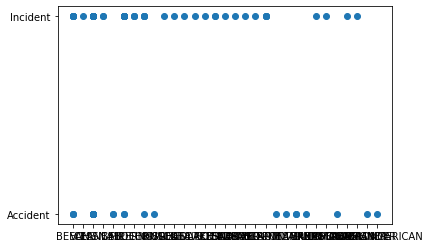

In [ ]:
plt.scatter(df3.ACFT_MAKE_NAME,df3.EVENT_TYPE_DESC)


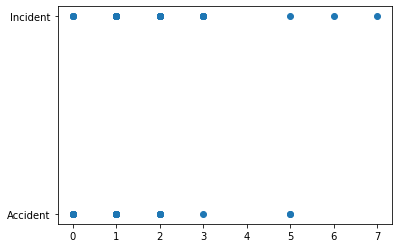

In [ ]:
plt.scatter(df3.total_injuries,df3.EVENT_TYPE_DESC)

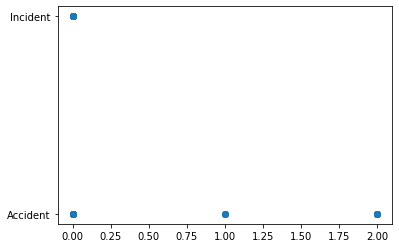

In [ ]:
plt.scatter(df3.total_deaths,df3.EVENT_TYPE_DESC)

After looking at scatter plots it can be seen that logistic regression best fits to the data set. But let us see whether this is correct or not. 

Here we observe that the aircraft name feature is not numerical. In order to train the data using logistic regression or any other model it should be converted to numerical.So here I am creating dummy variables which will helpful for conversion of this feature into numerical

In [ ]:
dummies=pd.get_dummies(df3.ACFT_MAKE_NAME)
merged=pd.concat([df3,dummies],axis='columns')#combining the dummy variables into the original data frame
print(merged)
final=merged.drop(['ACFT_MAKE_NAME','AERONCA','0'],axis='columns')#dropping original feature which is not numerical
final[0:5]

    ACFT_MAKE_NAME  total_injuries  total_deaths  ... SABRELINER  SOCATA  VANS
0            BEECH             0.0           1.0  ...          0       0     0
1             VANS             1.0           0.0  ...          0       0     1
2           CESSNA             1.0           0.0  ...          0       0     0
3          LANCAIR             1.0           0.0  ...          0       0     0
4           CESSNA             2.0           0.0  ...          0       0     0
..             ...             ...           ...  ...        ...     ...   ...
78         AERONCA             1.0           0.0  ...          0       0     0
79  NORTH AMERICAN             0.0           2.0  ...          0       0     0
80        CHAMPION             0.0           1.0  ...          0       0     0
81           BEECH             0.0           2.0  ...          0       0     0
82          CESSNA             0.0           2.0  ...          0       0     0

[83 rows x 35 columns]


,total_injuries,total_deaths,EVENT_TYPE_DESC,AERO COMMANDER,AEROSTAR INTERNATIONAL,AIRBUS,BEECH,BELL,BOEING,CESSNA,CHAMPION,CHRISTEN,CONSOLIDATED VULTEE,EMBRAER,ENSTROM,FAIRCHILD,FLIGHT DESIGN,GLOBE,GREAT LAKES,GRUMMAN,GULFSTREAM,HUGHES,LANCAIR,MAULE,MOONEY,NORTH AMERICAN,PIPER,PITTS,SAAB,SABRELINER,SOCATA,VANS
0,0.0,1.0,Accident,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,0.0,Incident,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1.0,0.0,Incident,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,0.0,Incident,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2.0,0.0,Incident,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Converting event column which is target variable into 0's and 1's
which helps in easy training

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
final.EVENT_TYPE_DESC=le.fit_transform(final.EVENT_TYPE_DESC)
dfle=final
dfle

,total_injuries,total_deaths,EVENT_TYPE_DESC,AERO COMMANDER,AEROSTAR INTERNATIONAL,AIRBUS,BEECH,BELL,BOEING,CESSNA,CHAMPION,CHRISTEN,CONSOLIDATED VULTEE,EMBRAER,ENSTROM,FAIRCHILD,FLIGHT DESIGN,GLOBE,GREAT LAKES,GRUMMAN,GULFSTREAM,HUGHES,LANCAIR,MAULE,MOONEY,NORTH AMERICAN,PIPER,PITTS,SAAB,SABRELINER,SOCATA,VANS
0,0.0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
79,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
80,0.0,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
81,0.0,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Creating X and y dataframes which are target and feature variables respectively.

In [ ]:
X=dfle.drop('EVENT_TYPE_DESC',axis='columns')
y=dfle.EVENT_TYPE_DESC
print(X,y)

    total_injuries  total_deaths  AERO COMMANDER  ...  SABRELINER  SOCATA  VANS
0              0.0           1.0               0  ...           0       0     0
1              1.0           0.0               0  ...           0       0     1
2              1.0           0.0               0  ...           0       0     0
3              1.0           0.0               0  ...           0       0     0
4              2.0           0.0               0  ...           0       0     0
..             ...           ...             ...  ...         ...     ...   ...
78             1.0           0.0               0  ...           0       0     0
79             0.0           2.0               0  ...           0       0     0
80             0.0           1.0               0  ...           0       0     0
81             0.0           2.0               0  ...           0       0     0
82             0.0           2.0               0  ...           0       0     0

[83 rows x 31 columns] 0     0
1     1



splitting the data into training and testing data and impelmenting logistic regression

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X_train,y_train)
y_predicted=reg.predict(X_test)
print(y_predicted)
(reg.score(X_test,y_test))

[1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]


0.8823529411764706

The model accuracy is 88.23 which is pretty good. Making confusion matrix to check the ratios of truths and false values. Now I would like to compare this with other models. 
Plotting confusion matrix for this model to know all the truths and false values. 

In [ ]:
from scipy.stats import ttest_rel
tset,pval=ttest_rel(y_predicted,y_test)
print(pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

0.16348548685933983
we are accepting null hypothesis


So the data set that is provided is not able to get statistically significant result through logistic regression model

[[ 2  2]
 [ 0 13]]


Text(69.0, 0.5, 'Truth')

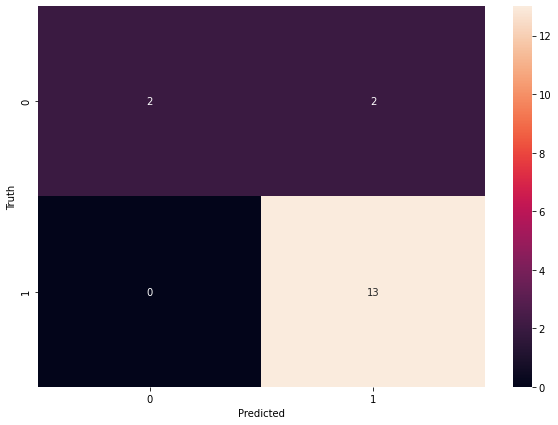

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
print(cm)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Now I would like to train the model using decision tree algorithm Even this algorithm helps us to predict whether the event is accident of incident

In [ ]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
y_predicted=model.predict(X_test)
print(y_predicted)
model.score(X_test,y_test)

[0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1]


0.5882352941176471

Here we see that the accuracy is pretty low. 

In [ ]:
from scipy.stats import ttest_rel
tset,pval=ttest_rel(y_predicted,y_test)
print(pval)
if pval < 0.06:    # alpha value is 0.06 or 6%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

0.05574860533681039
 we are rejecting null hypothesis


Here I have considered alpha value 6 percent instead of 5. Here p value was 0.055 and also this model gave me the lowest accuracy.. This means though the model gave me the least accuracy it is statistically significant. I can say that this is correct because all the datasets will not be the same. So this accuracy can be achevied with other datasets also. 

Training the model using entropy as main criterion.

In [ ]:
from sklearn import tree
model=tree.DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
y_predicted=model.predict(X_test)
print(y_predicted)
model.score(X_test,y_test)

[0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1]


0.5882352941176471

[[3 1]
 [6 7]]


Text(69.0, 0.5, 'Truth')

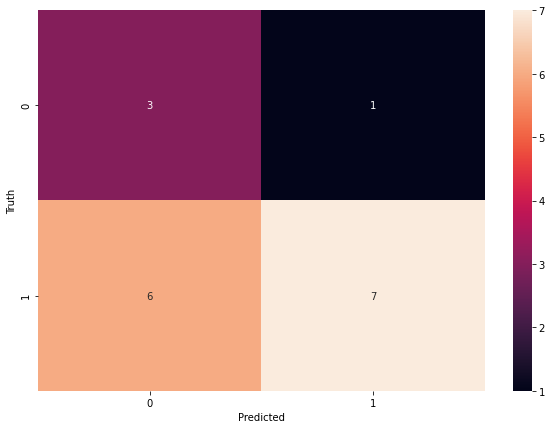

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
print(cm)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Now I am training the same model using Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)
print(model.fit(X_train,y_train))
y_predicted=model.predict(X_test)
print(y_predicted)
model.score(X_test,y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
[1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]


0.8823529411764706

In [ ]:
from scipy.stats import ttest_rel
tset,pval=ttest_rel(y_predicted,y_test)
print(pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

0.16348548685933983
we are accepting null hypothesis


It is statistically insignificant

Here it is seen that there is increase in accuracy in random forest classifier because it splits the training data and takes 100 decision trees and then take the majority for them to come to the conclusion

[[ 2  2]
 [ 0 13]]


Text(69.0, 0.5, 'Truth')

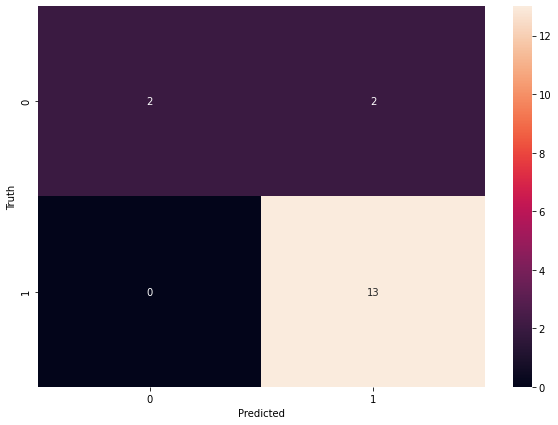

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
print(cm)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Training the model with the help of svm classifier 

In [ ]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)
y_predicted=model.predict(X_test)
print(y_predicted)
model.score(X_test,y_test)

[1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1]


0.8235294117647058

In [ ]:
from scipy.stats import ttest_rel
tset,pval=ttest_rel(y_predicted,y_test)
print(pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

0.579455116589547
we are accepting null hypothesis


Now using svm accuracy is 82.35 which is better than random forest classifier. 
But  of all we observe that  logistic regression has the highest accuracy which is interpreted through the above scatter plots also. So logistic regression is better model in comparision to others for this data set. 

It is also statistically insignificant